## Davies Bauldin Method

Denetimsiz öğrenmede etiket olmadan, sadece kümelerin yapısına bakarak kümelerin kalitesini ölçen bir metriktir

Küme içi yayılım ve kümelerin merkezleri arasındaki uzaklık incelenir

Eğer değerler küçükse kümelenme iyi olarak adlandırılır

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

In [18]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=42)

In [4]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [9]:
X = df[["NOX", "RAD", "RM"]]  
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

In [11]:
db_score = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin Skoru: {db_score:.3f}")

Davies-Bouldin Skoru: 0.625


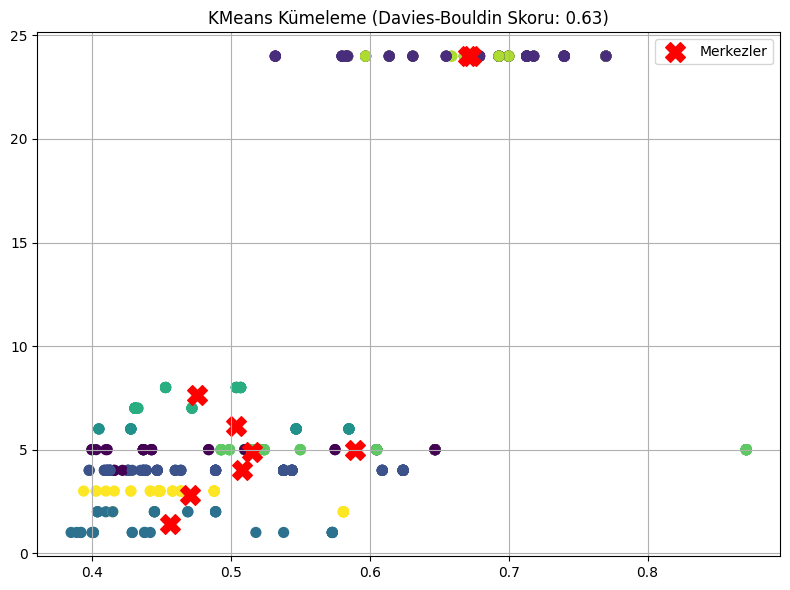

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Merkezler')
plt.title(f"KMeans Kümeleme (Davies-Bouldin Skoru: {db_score:.2f})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = davies_bouldin_score(X, labels)
    scores.append(score)
    print(f"{k} küme için DB Skoru: {score:.3f}")

2 küme için DB Skoru: 0.101
3 küme için DB Skoru: 0.625
4 küme için DB Skoru: 0.576
5 küme için DB Skoru: 0.624
6 küme için DB Skoru: 0.601
7 küme için DB Skoru: 0.673
8 küme için DB Skoru: 0.754
9 küme için DB Skoru: 0.741


## Scaling

Makine öğrenmesinde sayısal özellikler farklı aralıklarda olabileceğinden bazen çok büyük değerler diğerlerinden daha önemli gibi algılanabilip makinenin yanlış öğrenmesine neden olabilir. Bu durumun yaşanmaması için Scaling kullanırız

Daha çok KMeans gibi mesafe ölçen algoritmalarda yanlış çalışmayı önler